In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Verify the file path and ensure the file exists
file_path = '/content/drive/MyDrive/TFM/qualifying_1960-2024_seleccionado.xls'  # Double check this path!
!ls -l {file_path}  # Check if the file exists and its size

# Try opening the file with a text editor to inspect its contents
!head {file_path}

-rw------- 1 root root 248346 Jul 16 10:45 /content/drive/MyDrive/TFM/qualifying_1960-2024_seleccionado.xls
home_team,away_team,home_team_code,away_team_code,home_score,away_score,winner,winner_reason,year,status,round,score_dif,home_winner
Russia,Hungary,RUS,HUN,3.0,1.0,Russia,WIN_REGULAR,1960,FINISHED,ROUND_OF_16,2.0,True
France,Greece,FRA,GRE,7.0,1.0,France,WIN_REGULAR,1960,FINISHED,ROUND_OF_16,6.0,True
Romania,Türki̇ye,ROU,TUR,3.0,0.0,Romania,WIN_REGULAR,1960,FINISHED,ROUND_OF_16,3.0,True
Greece,France,GRE,FRA,1.0,1.0,,DRAW,1960,FINISHED,ROUND_OF_16,0.0,False
Ireland,Czechoslovakia,IRL,TCH,2.0,0.0,Ireland,WIN_REGULAR,1960,FINISHED,PRELIMINARY,2.0,True
Türki̇ye,Romania,TUR,ROU,2.0,0.0,Türki̇ye,WIN_REGULAR,1960,FINISHED,ROUND_OF_16,2.0,True
Czechoslovakia,Ireland,TCH,IRL,4.0,0.0,Czechoslovakia,WIN_REGULAR,1960,FINISHED,PRELIMINARY,4.0,True
Norway,Austria,NOR,AUT,0.0,1.0,Austria,WIN_REGULAR,1960,FINISHED,ROUND_OF_16,-1.0,False
Yugoslavia,Bulgaria,YUG,BUL,2.0,0.0,Yugoslavia,WIN_REGULAR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv(file_path)

In [ ]:
df1.shape

(2831, 13)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2831 entries, 0 to 2830
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   home_team       2831 non-null   object 
 1   away_team       2831 non-null   object 
 2   home_team_code  2831 non-null   object 
 3   away_team_code  2831 non-null   object 
 4   home_score      2831 non-null   float64
 5   away_score      2831 non-null   float64
 6   winner          2282 non-null   object 
 7   winner_reason   2831 non-null   object 
 8   year            2831 non-null   int64  
 9   status          2831 non-null   object 
 10  round           2831 non-null   object 
 11  score_dif       2831 non-null   float64
 12  home_winner     2831 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(8)
memory usage: 268.3+ KB


In [ ]:
#Number of matches by year
df1.groupby('year')['year'].count()
#Number of matches by round
df1['round'].value_counts()

round
PRELIMINARY       1422
QUALIFYING        1281
FINAL               56
QUARTER_FINALS      40
ROUND_OF_16         32
Name: count, dtype: int64

# Modelos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Calcular la media de goles anotados por cada país en casa y fuera
home_goals = df1.groupby('home_team')['home_score'].mean()
away_goals = df1.groupby('away_team')['away_score'].mean()

# Calcular la probabilidad de gol de cada país como la media de goles anotados en casa y fuera
goal_probabilities = (home_goals + away_goals) / 2

print(goal_probabilities)

home_team
Albania                   0.898148
Andorra                   0.242857
Armenia                   0.973684
Austria                   1.864407
Azerbaijan                0.631579
Belarus                   0.804993
Belgium                   1.912432
Bosnia and Herzegovina    1.379418
Bulgaria                  1.311316
Croatia                   1.897436
Cyprus                    0.827869
Czechia                   2.052632
Czechoslovakia            1.910714
Denmark                   1.719697
England                   2.413793
Estonia                   0.658333
FYR Macedonia             1.000000
Faroe Islands             0.534884
Finland                   1.155146
France                    2.166667
Georgia                   1.055764
Germany                   2.305085
Gibraltar                 0.192308
Greece                    1.461538
Hungary                   1.623602
Iceland                   1.001389
Ireland                   1.264925
Israel                    1.512195
Italy     

In [ ]:
# Incorporar la probabilidad de gol en el dataframe original
df1['home_goal_prob'] = df1['home_team'].map(goal_probabilities)
df1['away_goal_prob'] = df1['away_team'].map(goal_probabilities)

# Seleccionar las columnas de interés
X = df1[['home_team', 'away_team', 'round', 'home_goal_prob', 'away_goal_prob']]  # Características
y = df1['home_winner']  # Variable objetivo

# Convertir las variables categóricas en variables numéricas usando OneHotEncoder
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['home_team', 'away_team', 'round']])

# Convertir el resultado de OneHotEncoder a DataFrame
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out())

# Añadir las probabilidades de gol al dataset codificado
X_encoded_df['home_goal_prob'] = X['home_goal_prob'].values
X_encoded_df['away_goal_prob'] = X['away_goal_prob'].values

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded_df)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



## Redes Neuronales: Multilayer Perceptron (MLP)

In [ ]:
# Crear el modelo de MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Entrenar el modelo
MLP.fit(X_train, y_train)

# Hacer predicciones
y_pred = MLP.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7001763668430335
Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.69      0.70       290
        True       0.69      0.71      0.70       277

    accuracy                           0.70       567
   macro avg       0.70      0.70      0.70       567
weighted avg       0.70      0.70      0.70       567



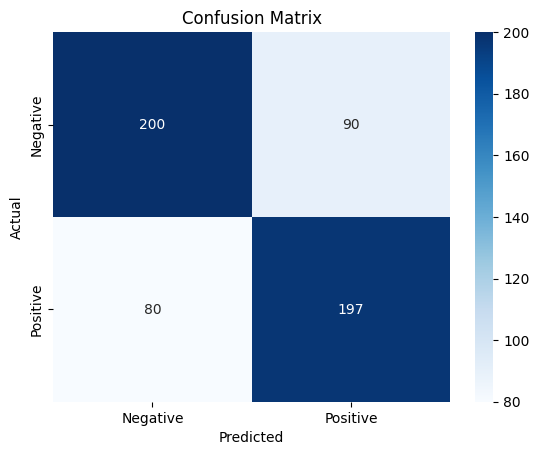

In [ ]:
# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# Predecir el resultado de nuevos partidos de la Eurocopa
# Supongamos que tienes un nuevo dataset con los partidos de la Eurocopa
new_matches = {
    'home_team': ['Germany', 'Spain', 'Spain'],  # Ejemplo de equipos en casa
    'away_team': ['Spain', 'France', 'England'],  # Ejemplo de equipos fuera
    'round': ['QUARTER_FINALS', 'PRELIMINARY', 'FINAL']  # Ejemplo de rondas
}

new_matches_df = pd.DataFrame(new_matches)

# Añadir las probabilidades de gol al nuevo dataset
new_matches_df['home_goal_prob'] = new_matches_df['home_team'].map(goal_probabilities)
new_matches_df['away_goal_prob'] = new_matches_df['away_team'].map(goal_probabilities)

# Codificar las nuevas partidas
new_matches_encoded = encoder.transform(new_matches_df[['home_team', 'away_team', 'round']])

# Convertir el resultado de OneHotEncoder a DataFrame, especificando los nombres de las columnas
new_matches_encoded_df = pd.DataFrame(new_matches_encoded.toarray(), columns=encoder.get_feature_names_out())

# Añadir las probabilidades de gol al dataset codificado
new_matches_encoded_df['home_goal_prob'] = new_matches_df['home_goal_prob'].values
new_matches_encoded_df['away_goal_prob'] = new_matches_df['away_goal_prob'].values

# Escalar las características de las nuevas partidas
new_matches_scaled = scaler.transform(new_matches_encoded_df) # Use the same scaler fitted on the training data

# Predecir con el modelo entrenado
new_predictions = MLP.predict(new_matches_scaled) # Pass the scaled data to predict

# Mostrar los resultados
new_matches_df['home_winner'] = new_predictions
print(new_matches_df)

  home_team away_team           round  home_goal_prob  away_goal_prob  \
0   Germany     Spain  QUARTER_FINALS        2.305085        2.544324   
1     Spain    France     PRELIMINARY        2.544324        2.166667   
2     Spain   England           FINAL        2.544324        2.413793   

   home_winner  
0        False  
1        False  
2        False  


## Random Forest Classifier

In [ ]:
# Crear el modelo de RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
RFC.fit(X_train, y_train)

# Hacer predicciones
y_pred = RFC.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7142857142857143
Classification Report:
              precision    recall  f1-score   support

       False       0.72      0.73      0.72       290
        True       0.71      0.70      0.70       277

    accuracy                           0.71       567
   macro avg       0.71      0.71      0.71       567
weighted avg       0.71      0.71      0.71       567



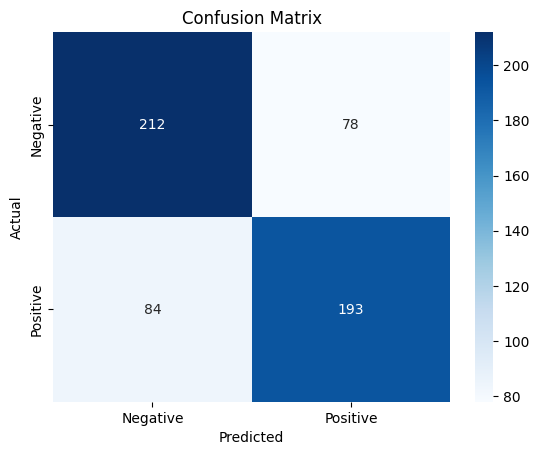

In [ ]:
# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [19]:
# Predecir el resultado de nuevos partidos de la Eurocopa
# Supongamos que tienes un nuevo dataset con los partidos de la Eurocopa
new_matches = {
    'home_team': ['Germany', 'Spain', 'Spain'],  # Ejemplo de equipos en casa
    'away_team': ['Spain', 'France', 'England'],  # Ejemplo de equipos fuera
    'round': ['QUARTER_FINALS', 'PRELIMINARY', 'FINAL']  # Ejemplo de rondas
}

new_matches_df = pd.DataFrame(new_matches)

# Añadir las probabilidades de gol al nuevo dataset
new_matches_df['home_goal_prob'] = new_matches_df['home_team'].map(goal_probabilities)
new_matches_df['away_goal_prob'] = new_matches_df['away_team'].map(goal_probabilities)

# Codificar las nuevas partidas
new_matches_encoded = encoder.transform(new_matches_df[['home_team', 'away_team', 'round']])

# Crear un nuevo DataFrame con las variables codificadas y nombres de columnas correctos
new_matches_encoded_df = pd.DataFrame.sparse.from_spmatrix(
    new_matches_encoded,
    columns=encoder.get_feature_names_out(['home_team', 'away_team', 'round'])
)

# Concatenar las variables numéricas originales con las codificadas
# Ensure both DataFrames have numeric columns
new_matches_final = pd.concat(
    [new_matches_encoded_df, new_matches_df[['home_goal_prob', 'away_goal_prob']].astype(float)], # Convert to float
    axis=1
)

# Predecir con el modelo entrenado
new_predictions = RFC.predict(new_matches_final)

# Mostrar los resultados
new_matches_df['home_winner'] = new_predictions
print(new_matches_df)

  home_team away_team           round  home_goal_prob  away_goal_prob  \
0   Germany     Spain  QUARTER_FINALS        2.305085        2.544324   
1     Spain    France     PRELIMINARY        2.544324        2.166667   
2     Spain   England           FINAL        2.544324        2.413793   

   home_winner  
0         True  
1         True  
2         True  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


##Logistic Regression

In [ ]:
# Crear el modelo de Logistic Regression
Logistic_Regression = LogisticRegression(random_state=42)

# Entrenar el modelo
Logistic_Regression.fit(X_train, y_train)

# Hacer predicciones
y_pred = Logistic_Regression.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7583774250440917
Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.77      0.76       290
        True       0.75      0.75      0.75       277

    accuracy                           0.76       567
   macro avg       0.76      0.76      0.76       567
weighted avg       0.76      0.76      0.76       567



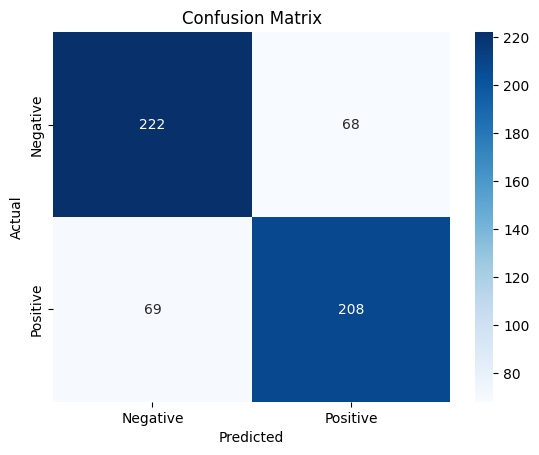

In [ ]:
# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Predecir el resultado de nuevos partidos de la Eurocopa
# Supongamos que tienes un nuevo dataset con los partidos de la Eurocopa
new_matches = {
    'home_team': ['Germany', 'Spain', 'Spain'],  # Ejemplo de equipos en casa
    'away_team': ['Spain', 'France', 'England'],  # Ejemplo de equipos fuera
    'round': ['QUARTER_FINALS', 'PRELIMINARY', 'FINAL']  # Ejemplo de rondas
}
new_matches_df = pd.DataFrame(new_matches)

# Añadir las probabilidades de gol al nuevo dataset
new_matches_df['home_goal_prob'] = new_matches_df['home_team'].map(goal_probabilities)
new_matches_df['away_goal_prob'] = new_matches_df['away_team'].map(goal_probabilities)

# Codificar las nuevas partidas
new_matches_encoded = encoder.transform(new_matches_df[['home_team', 'away_team', 'round']])
new_matches_encoded_df = pd.DataFrame.sparse.from_spmatrix(
    new_matches_encoded,
    columns=encoder.get_feature_names_out(['home_team', 'away_team', 'round']))

# Añadir las probabilidades de gol al dataset codificado
new_matches_encoded_df['home_goal_prob'] = new_matches_df['home_goal_prob'].values
new_matches_encoded_df['away_goal_prob'] = new_matches_df['away_goal_prob'].values

# Escalar las características
new_matches_scaled = scaler.transform(new_matches_encoded_df)

# Predecir con el modelo entrenado
new_predictions = Logistic_Regression.predict(new_matches_scaled)

# Mostrar los resultados
new_matches_df['home_winner'] = new_predictions
print(new_matches_df)

  home_team away_team           round  home_goal_prob  away_goal_prob  \
0   Germany     Spain  QUARTER_FINALS        2.305085        2.544324   
1     Spain    France     PRELIMINARY        2.544324        2.166667   
2     Spain   England           FINAL        2.544324        2.413793   

   home_winner  
0         True  
1         True  
2        False  


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


### Cross Validation

In [ ]:
# Validación Cruzada
results = []
for i in range(2,7):
  print(f"\nValidación Cruzada con i folds:")
  cv_scores1 = cross_val_score(MLP, X_encoded, y, cv=i)
  cv_scores2 = cross_val_score(RFC, X_encoded, y, cv=i)
  cv_scores3 = cross_val_score(Logistic_Regression, X_encoded, y, cv=i)

  results.append({
      'Folds': i,
      'MLP': cv_scores1.mean(),
      'RFC': cv_scores2.mean(),
      'Logistic Regression': cv_scores3.mean()
  })

results_df = pd.DataFrame(results)
print(results_df)


Validación Cruzada con i folds:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Validación Cruzada con i folds:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


##Curvas ROC


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


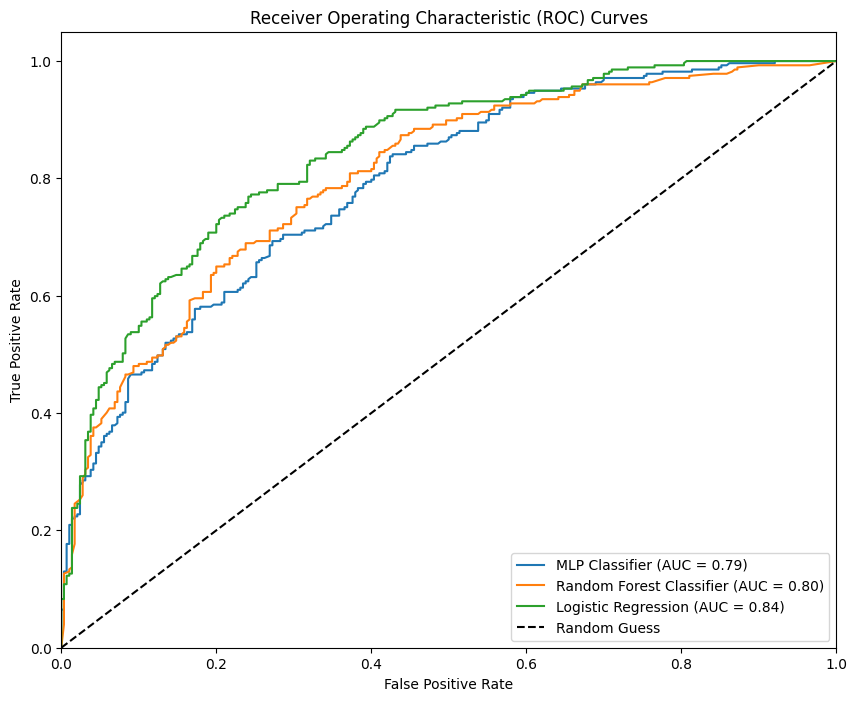

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Crear y entrenar los modelos
models = {
    'MLP Classifier': MLPClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    models[name] = model

# Función para plotear las curvas ROC
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()

# Plotear las curvas ROC de los tres modelos
plot_roc_curves(models, X_test, y_test)